# Topics

1. Text Preprocessing - NLTK / Spacy / NER / N-grams
2. POS Tagging / Vectorization / Stemming / Lemmatization
3. Text Classification
4. Sentiment Analysis
5. Keyword Extraction - RAKE / YAKE
6. Classification / Sentiment Analysis - Deep Learning
7. Topic Modelling
8. Deep Learning - Encoder-Decoder models, Attention, Transformers

# Text Preprocessing

## NLTK

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Tokenization

In [ ]:
text = "I am Jonathan Majors. I am He Who Remains "

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

print(sent_tokenize(text))
print(word_tokenize(text))

['I am Jonathan Majors.', 'I am He Who Remains']
['I', 'am', 'Jonathan', 'Majors', '.', 'I', 'am', 'He', 'Who', 'Remains']


### Stopword Removal

In [ ]:
from nltk.corpus import stopwords

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words = text.split()
[word for word in words if word not in stopwords.words("english")]

['I', 'Jonathan', 'Majors.', 'I', 'He', 'Who', 'Remains']

### Stemming

1. PorterStemmer
2. LancasterStemmer
3. PorterStemmer

In [ ]:
from nltk.stem.porter import PorterStemmer
[PorterStemmer().stem(word) for word in words]

['i', 'am', 'jonathan', 'majors.', 'i', 'am', 'he', 'who', 'remain']

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
[LancasterStemmer().stem(word) for word in words]

['i', 'am', 'jonath', 'majors.', 'i', 'am', 'he', 'who', 'remain']

In [ ]:
from nltk.stem.snowball import SnowballStemmer
[SnowballStemmer(language="english").stem(word) for word in words]

['i', 'am', 'jonathan', 'majors.', 'i', 'am', 'he', 'who', 'remain']

### Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
[WordNetLemmatizer().lemmatize(word) for word in words]

['I', 'am', 'Jonathan', 'Majors.', 'I', 'am', 'He', 'Who', 'Remains']

### POS Tagger

In [ ]:
text = "Reinforcement Learning paper is going to be difficult"

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

tokenized = sent_tokenize(text)

for w in tokenized:
    wordsList = word_tokenize(w)
    wordsList = [w for w in wordsList if not w in stopwords.words("english")]

    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[('Reinforcement', 'NNP'), ('Learning', 'NNP'), ('paper', 'NN'), ('going', 'VBG'), ('difficult', 'JJ')]


## Spacy

In [ ]:
## Will do later, very boringgggggg

# Text Classification

### Get Data

In [ ]:
!pip install kaggle --quiet

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d team-ai/spam-text-message-classification

  0% 0.00/208k [00:00<?, ?B/s]
100% 208k/208k [00:00<00:00, 128MB/s]


In [ ]:
!unzip /content/spam-text-message-classification.zip

Archive:  /content/spam-text-message-classification.zip
  inflating: SPAM text message 20170820 - Data.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Load Data

In [ ]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
any(df.isna().sum())

False

### Exploratory Data Analysis

In [ ]:
vc = df['Category'].value_counts()

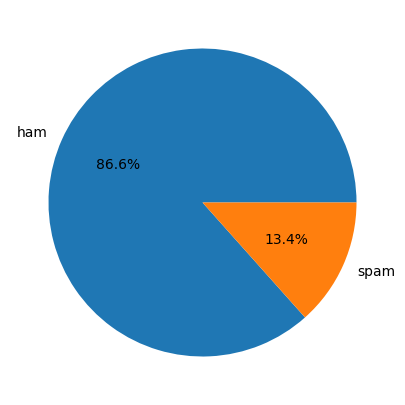

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=vc.values, labels=vc.keys(), autopct='%.3g%%');

In [ ]:
df['length'] = df['Message'].str.len()
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))

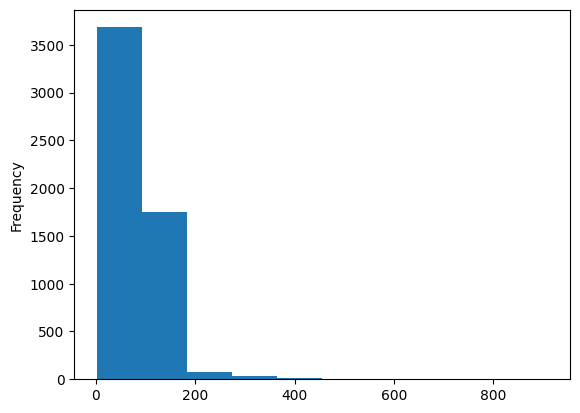

In [ ]:
df['length'].plot(kind='hist');

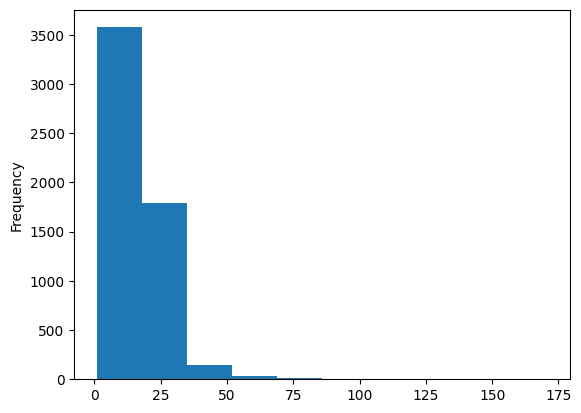

In [ ]:
df['word_count'].plot(kind='hist');

### Text Preprocessing

In [ ]:
def cleanse(text):

    """
    Preprocess function
    1. Lowercase
    2. Remove Punctuations
    3. Stopword Removal
    4. Lemmatization

    Args:
        text

    Returns:
        preprocessed text
    """

    # Convert text to lowercase
    text = " ".join(x.lower() for x in text.split())
    # Remove punctutations
    text = re.sub('[^a-zA-Z0-9-]+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split())

    return text

In [ ]:
%%time
df['message_clean'] = df['Message'].apply(cleanse)

CPU times: user 976 ms, sys: 81.5 ms, total: 1.06 s
Wall time: 1.08 s


### Visualize

In [ ]:
df_final = df[['message_clean', 'Category']]

In [ ]:
import random
idx = random.randint(0, len(df_final)-5)
for row in df_final[["message_clean", "Category"]][idx:idx+5].itertuples():

    _, message, mtype = row
    print("=================================")
    print(f"{mtype}\n")
    print(f"{message}\n")
    print("=================================")

ham

reading gud habit nan bari hudgi yorge pataistha ertini kano -

ham

aight still want get money

spam

free top ringtone -sub weekly ringtone-get 1st week free-send subpoly 81618- 3 per week-stop sms-08718727870

ham

ok ok ok whats ur today plan

ham

town v important



### Model Training

In [ ]:
X, y = df_final['message_clean'], df['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5014,), (558,), (5014,), (558,))

In [ ]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
def evaluate(preds):
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    print(f"Accuracy Score:\t{accuracy*100:.3f}%")
    print(f"F1 Score:\t{f1*100:.3f}%")

#### LogisticRegression

In [ ]:
lr = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression() )
])
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
evaluate(lr_preds)

Accuracy Score:	95.699%
F1 Score:	82.353%


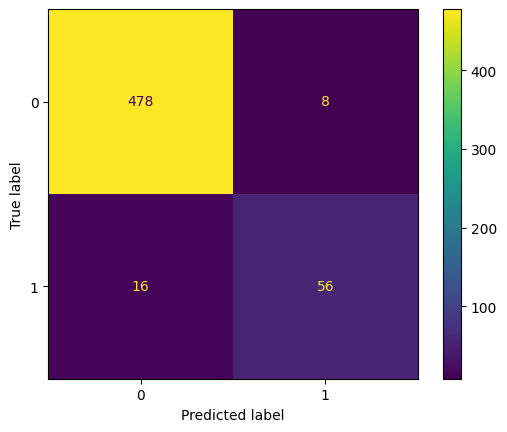

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds);

#### Multinomial Naive Bayes

In [ ]:
mnb = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", MultinomialNB() )
])
mnb.fit(X_train, y_train)

mnb_preds = mnb.predict(X_test)
evaluate(mnb_preds)

Accuracy Score:	97.670%
F1 Score:	90.076%


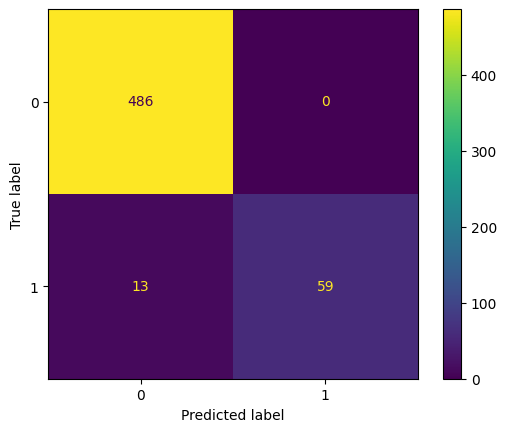

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, mnb_preds);

#### XGBoost

In [ ]:
xgb = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", XGBClassifier() )
])
xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)
evaluate(xgb_preds)

Accuracy Score:	97.849%
F1 Score:	91.176%


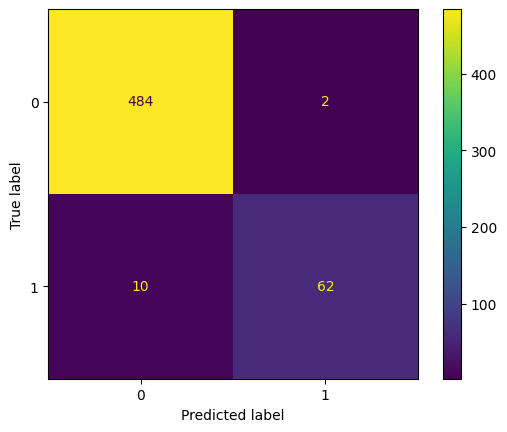

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds);

In [ ]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       486
           1       0.97      0.86      0.91        72

    accuracy                           0.98       558
   macro avg       0.97      0.93      0.95       558
weighted avg       0.98      0.98      0.98       558



# Sentiment Analysis

### Load Data

In [ ]:
!kaggle datasets download -d mfaaris/spotify-app-reviews-2022

  0% 0.00/4.04M [00:00<?, ?B/s]
100% 4.04M/4.04M [00:00<00:00, 56.2MB/s]


In [ ]:
!unzip /content/spotify-app-reviews-2022.zip

Archive:  /content/spotify-app-reviews-2022.zip
  inflating: reviews.csv             


In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Input

In [ ]:
df = pd.read_csv('/content/reviews.csv')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
df = df[['Review','Rating']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [ ]:
any(df.isna().sum())

False

## Feature Transformation

In [ ]:
def ratings_to_sentiment(rating):

    if rating >= 3:
        sentiment = 1
    else:
        sentiment = 0

    return sentiment

In [ ]:
df['Sentiment'] = df['Rating'].apply(ratings_to_sentiment)

In [ ]:
df['token_counts'] = df['Review'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
df_final = df[['Review', 'Sentiment']]

In [ ]:
X, y = df_final['Review'], df_final['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Vectorizer and Embedding layer

In [ ]:
max_length = round(df['token_counts'].mean())
max_vocab_length = 10000

In [ ]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(X_train)

In [ ]:
embedding = Embedding(input_dim=max_vocab_length + 1,
                      output_dim=256,
                      input_length=max_length)

## Model Building

### LSTM

In [ ]:
inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = LSTM(64)(x)
output = Dense(1, activation='sigmoid')(x)

model_0 = Model(inputs=inputs, outputs=output)

In [ ]:
model_0.compile(optimizer='Adam',
                loss='BinaryCrossentropy',
                metrics=["accuracy"])

history_0 = model_0.fit(X_train, y_train,
                        epochs=5, batch_size=64,
                        validation_data=[X_test, y_test])

Epoch 1/5
770/770 [==============================] - 30s 32ms/step - loss: 0.2891 - accuracy: 0.8722 - val_loss: 0.4285 - val_accuracy: 0.8137
Epoch 2/5
770/770 [==============================] - 12s 16ms/step - loss: 0.2281 - accuracy: 0.9012 - val_loss: 0.4839 - val_accuracy: 0.8094
Epoch 3/5
770/770 [==============================] - 15s 19ms/step - loss: 0.2042 - accuracy: 0.9129 - val_loss: 0.5271 - val_accuracy: 0.8083
Epoch 4/5
770/770 [==============================] - 11s 14ms/step - loss: 0.1815 - accuracy: 0.9227 - val_loss: 0.5646 - val_accuracy: 0.8090
Epoch 5/5
770/770 [==============================] - 10s 13ms/step - loss: 0.1628 - accuracy: 0.9307 - val_loss: 0.6582 - val_accuracy: 0.8093


In [ ]:
model_0.evaluate(X_test, y_test)

385/385 [==============================] - 3s 7ms/step - loss: 0.6582 - accuracy: 0.8093


[0.6581507325172424, 0.8093189597129822]

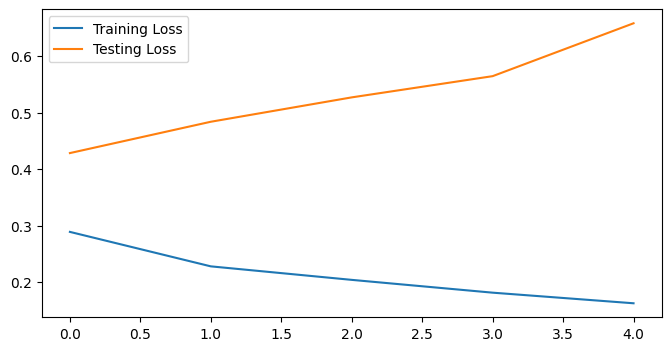

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history_0.history['loss'], label="Training Loss")
plt.plot(history_0.history['val_loss'], label="Testing Loss")
plt.legend();

# Keyword Extraction - RAKE

In [ ]:
!pip install rake-nltk -q

In [ ]:
import pandas as pd
import numpy as np
from rake_nltk import Rake

In [ ]:
df = pd.read_csv('/content/reviews.csv')

In [ ]:
df.Review[5]

'The player controls sometimes disappear for no reason. App restart forgets what I was playing but fixes the issue.'

In [ ]:
r = Rake(punctuations=[')','(',',',':','),',').','.'])

In [ ]:
r.extract_keywords_from_text(df.Review[5])

In [ ]:
phrase_df = pd.DataFrame(r.get_ranked_phrases_with_scores(), columns = ['score','phrase'])

In [ ]:
phrase_df.head()

,score,phrase
0,16.0,player controls sometimes disappear
1,9.0,app restart forgets
2,1.0,reason
3,1.0,playing
4,1.0,issue


# Topic Modelling

In [ ]:
!kaggle datasets download therohk/million-headlines

 42% 9.00M/21.4M [00:00<00:00, 20.3MB/s]
100% 21.4M/21.4M [00:00<00:00, 45.8MB/s]


In [ ]:
!unzip million-headlines.zip

Archive:  million-headlines.zip
  inflating: abcnews-date-text.csv   


In [ ]:
import pandas as pd
import re
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

In [ ]:
df = pd.read_csv('/content/abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
df = df.sample(frac=0.05).reset_index(drop=True)

In [ ]:
def cleanse(text):

    """
    Preprocess function
    1. Lowercase
    2. Remove Punctuations
    3. Stopword Removal
    4. Lemmatization

    Args:
        text

    Returns:
        preprocessed text
    """

    text = " ".join(x.lower() for x in text.split())
    text = re.sub('[^a-zA-Z0-9-]+', ' ', text)
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)
    lemmatizer = WordNetLemmatizer()
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split())

    return text

In [ ]:
%%time
df['headline'] = df['headline_text'].apply(cleanse)

CPU times: user 790 ms, sys: 79.1 ms, total: 869 ms
Wall time: 873 ms


## Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words=list(stopwords.words('english')), max_features=1000)
vectorized_text = vectorizer.fit_transform(df['headline'])

## LSA Model

In [ ]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized',
                         n_iter=10, random_state=40)

lsa_topics = lsa_model.fit_transform(vectorized_text)

In [ ]:
vocab = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]

    print(f"Topic {i}")
    for word in sorted_words:
        print(word[0], end=" ")
    print('\n')

Topic 0
interview extended de nrl david john smith craig scott park 

Topic 1
police man new say fire court accused search sydney charged 

Topic 2
new council call say plan govt health open job law 

Topic 3
police new say probe search shooting investigate school fire officer 

Topic 4
new man police york shooting law found accused face murder 

Topic 5
fire house new cause claim suspicious home charge farmer crash 

Topic 6
win open world australia cup australian final sydney first back 

Topic 7
say australia man new wa could water power cut hit 

Topic 8
council plan govt back get talk win rate fire crash 

Topic 9
govt court win face accused nt wa urged report school 



## LDA

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',
                                      random_state=40)

lda_topics = lda_model.fit_transform(vectorized_text)

In [ ]:
vocab = vectorizer.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]

    print(f"Topic {i}")
    for word in sorted_words:
        print(word[0], end=" ")
    print('\n')

Topic 0
get power election world report fund return island green indonesia 

Topic 1
govt council hit win missing set big record mayor nt 

Topic 2
plan sa found help lead house take dy claim rural 

Topic 3
police say school australia first driver drug adelaide search go 

Topic 4
back trial job centre make abc labor home industry probe 

Topic 5
fire crash qld charged flood death find deal car could 

Topic 6
water woman year child national market hospital local ban business 

Topic 7
australian wa new day call mp pm test killed service 

Topic 8
interview court man accused cut change government attack canberra south 

Topic 9
talk minister rise price nsw murder time cup melbourne dead 

